In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Help : https://beckernick.github.io/matrix-factorization-recommender/

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

/kaggle/input/itmo-rs-autumn2019-track1/test_example.csv
/kaggle/input/itmo-rs-autumn2019-track1/train.csv
/kaggle/input/itmo-rs-autumn2019-track1/test_items.csv


In [2]:
training_data = pd.read_csv('../input/itmo-rs-autumn2019-track1/train.csv')
training_data.head()

,id,user_id,item_id,ts,rating
0,0,5072,2390,1462413337,3
1,1,1641,820,1468236014,3
2,2,5835,679,1465083622,4
3,3,4323,3109,1465881772,3
4,4,1813,965,1474541439,2


In [44]:
testing_data = pd.read_csv('../input/itmo-rs-autumn2019-track1/test_items.csv')
testing_data.head()

,Id,user_id,item_id,ts
0,0,2495,1510,1476797791
1,1,2346,1580,1513534315
2,2,2424,828,1516148226
3,3,379,268,1476244372
4,4,1977,2603,1476142205


In [3]:
training_data.describe()

,id,user_id,item_id,ts,rating
count,800164.000000,800164.000000,800164.000000,8.001640e+05,800164.000000
mean,400081.500000,2983.172845,1827.318236,1.468321e+09,3.590506
std,230987.594737,1735.568895,1074.648667,5.821292e+06,1.120328
min,0.000000,2.000000,1.000000,1.456631e+09,1.000000
25%,200040.750000,1477.000000,884.000000,1.464080e+09,3.000000
50%,400081.500000,2992.000000,1812.000000,1.467515e+09,4.000000
75%,600122.250000,4491.000000,2734.000000,1.474615e+09,4.000000
max,800163.000000,6040.000000,3706.000000,1.475696e+09,5.000000


In [4]:
ratings = pd.DataFrame(training_data.groupby('item_id')['rating'].mean())
ratings.head()

,rating
item_id,
1,3.626209
2,2.823529
3,3.278729
5,2.745455
6,3.210526


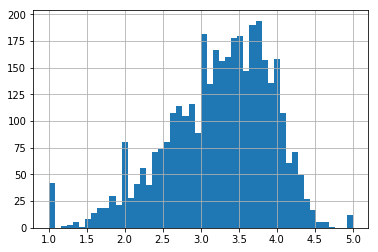

In [5]:
ratings['rating'].hist(bins=50)
plt.show()

In [6]:
ratings['number_of_ratings'] = training_data.groupby('item_id')['rating'].count()
ratings.head()

,rating,number_of_ratings
item_id,,
1,3.626209,1137
2,2.823529,136
3,3.278729,409
5,2.745455,385
6,3.210526,38


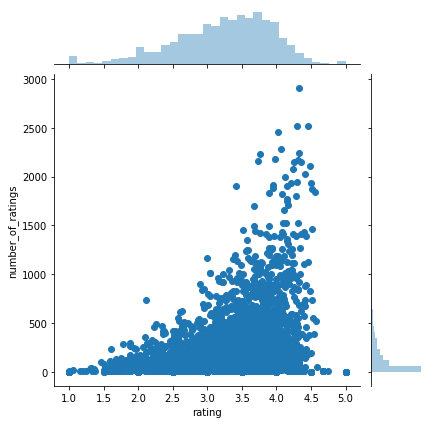

In [7]:
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)
plt.show()

In [8]:
movies_matrix = training_data.pivot_table(index='user_id', columns='item_id', values='rating')
movies_matrix.head()

item_id,1,2,3,5,6,7,8,9,10,11,...,3696,3698,3699,3700,3701,3702,3703,3704,3705,3706
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
movies_matrix = movies_matrix.fillna(0)
movies_matrix.head()

item_id,1,2,3,5,6,7,8,9,10,11,...,3696,3698,3699,3700,3701,3702,3703,3704,3705,3706
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
movies_matrix_np = movies_matrix.as_matrix()
user_ratings_mean = np.mean(movies_matrix_np, axis = 1)
movies_matrix_demeaned = movies_matrix_np - user_ratings_mean.reshape(-1, 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [11]:
movies_matrix_demeaned[:5]

array([[-0.07127253, -0.07127253, -0.07127253, ..., -0.07127253,
        -0.07127253, -0.07127253],
       [-0.13435281, -0.13435281, -0.13435281, ..., -0.13435281,
        -0.13435281, -0.13435281],
       [-0.36455489, -0.36455489, -0.36455489, ..., -0.36455489,
        -0.36455489, -0.36455489],
       [-0.0346805 , -0.0346805 , -0.0346805 , ..., -0.0346805 ,
        -0.0346805 , -0.0346805 ],
       [ 0.96504642, -0.03495358, -0.03495358, ..., -0.03495358,
        -0.03495358, -0.03495358]])

In [12]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(movies_matrix_demeaned, k = 50)

In [13]:
sigma = np.diag(sigma)

In [14]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = movies_matrix.columns)

In [15]:
preds_df.head()

item_id,1,2,3,5,6,7,8,9,10,11,...,3696,3698,3699,3700,3701,3702,3703,3704,3705,3706
0,-0.074347,-0.048633,-0.196376,0.056420,0.070047,-0.138899,0.025758,0.022182,0.185988,0.006170,...,0.036233,0.020340,0.053216,0.077577,0.003319,0.018295,0.057790,0.050589,0.095898,-0.069851
1,0.597185,-0.093182,0.174703,-0.196687,-0.065458,-0.337812,0.059815,0.014784,0.387887,0.667024,...,-0.060267,-0.022638,0.069022,0.029104,0.055799,0.029547,0.223643,-0.136378,-0.049525,0.138168
2,1.905021,0.027934,0.019067,1.035775,-0.060186,1.008576,0.027576,-0.114496,-0.068213,1.542668,...,-0.253134,0.122759,0.021880,0.128118,0.019396,-0.015593,2.101756,0.464101,-0.285133,0.241044
3,0.175435,0.118488,0.573206,0.021836,-0.040038,0.491541,0.020111,0.049781,0.028826,0.092264,...,-0.042658,-0.010050,0.009010,0.013096,-0.001350,0.008888,0.230335,-0.026795,-0.126154,-0.057866
4,0.378829,0.120332,0.552999,0.037923,0.100641,0.569166,0.048924,0.107845,-0.049869,0.001328,...,0.047160,-0.003910,0.075271,-0.005017,-0.035643,-0.000277,-0.041289,0.020464,0.208428,-0.084146


In [42]:
item_avg_rating_table = pd.DataFrame(training_data.groupby('item_id', as_index=False)['rating'].mean())

In [43]:
item_avg_rating_table

,item_id,rating
0,1,3.626209
1,2,2.823529
2,3,3.278729
3,5,2.745455
4,6,3.210526
...,...,...
3657,3702,3.666667
3658,3703,4.169913
3659,3704,3.228814
3660,3705,4.110280


In [73]:
output_table = pd.merge(testing_data, item_avg_rating_table, on='item_id', how='left').loc[:,['Id', 'rating']]

In [78]:
output_table  = output_table.rename(columns={'rating' : 'Predicted'})

In [82]:
output_table['Predicted'] = output_table['Predicted'].fillna(3)

In [87]:
output_table.to_csv('submission.csv',index=False)